<a href="https://colab.research.google.com/github/uclqmh3/Mona-s-attempts/blob/main/Attempts_at_RD_and_DiD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [71]:
from google.colab import files

# Upload the file
uploaded = files.upload()

Saving RD dataset 3.xlsx to RD dataset 3 (2).xlsx


In [72]:
import pandas as pd


#Name of uploaded file
file_name ='RD dataset 3.xlsx'

#Read data from the sheets
sheet1_df = pd.read_excel(file_name, sheet_name='GDP Per Capita')
sheet2_df = pd.read_excel(file_name, sheet_name='total pop. ')
sheet3_df = pd.read_excel(file_name, sheet_name='TEC')


#Print data from both sheets
print("Data from Sheet1:")
print(sheet1_df)

print("Data from Sheet2:")
print(sheet2_df)

print("Data from Sheet3:")
print(sheet3_df)

ValueError: Worksheet named 'GDP Per Capita' not found

In [4]:

# Merge the dataframes on 'Year' column
merged_df = pd.merge(sheet1_df, sheet2_df, on='Year')
merged_df = pd.merge(merged_df, sheet3_df, on='Year')

# Check the merged DataFrame to ensure it has the correct structure
print(merged_df)

    Year  GDP growth (annual %)  Population, Total  \
0   2010                    1.5          199239047   
1   2011                    2.7          203746065   
2   2012                    3.0          207667125   
3   2013                    4.4          211073978   
4   2014                    4.1          214264647   
5   2015                    4.2          217290883   
6   2016                    6.6          220138869   
7   2017                    4.4          223273967   
8   2018                    6.2          226928892   
9   2019                    2.5          230800899   
10  2020                   -1.3          235001746   
11  2021                    6.5          239477801   
12  2022                    4.8          243700667   
13  2023                    0.0          247504495   
14  2024                    2.5          251269164   

    Total Energy Consumption(GWh)   
0                            74348  
1                            77099  
2                       

In [5]:

# Step 3: Add a "post-CPEC" dummy variable
merged_df['post_cpec'] = (merged_df['Year'] >= 2017).astype(int)

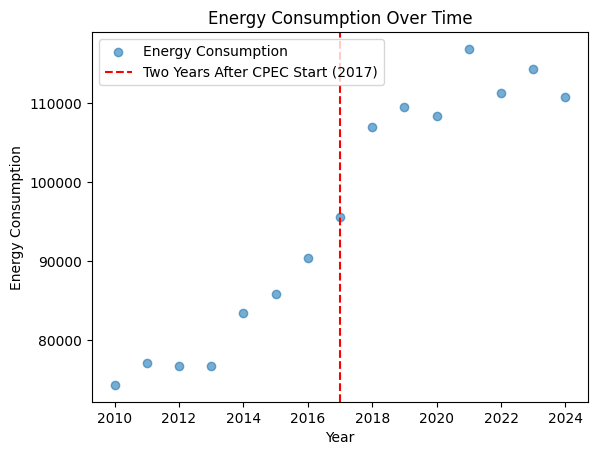

In [10]:
plt.scatter(merged_df['Year'], merged_df['Total Energy Consumption(GWh) '], alpha=0.6, label='Energy Consumption')
plt.axvline(x=2017, color='red', linestyle='--', label='Two Years After CPEC Start (2017)')
plt.title('Energy Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()

From the plot I'm assuming that RD would not be the correct method as there isnt a singificant jump after the CPEC start date. I then decided to try DiD comparing Sindh (where alot of CPEC projects were based in) and KPK where there were minimal CPEC projects as a control.

In [64]:
from google.colab import files

# Upload the file
uploaded = files.upload()

Saving Final Dataset.xlsx to Final Dataset.xlsx


In [65]:
import pandas as pd

#Name of uploaded file
file_name ='Final Dataset.xlsx'

#Read data from the sheets
sheet1_df = pd.read_excel(file_name, sheet_name='Sindh')
sheet2_df = pd.read_excel(file_name, sheet_name='KPK')

# Merge the dataframes on 'Year' column
merged_df1 = pd.merge(sheet1_df, sheet2_df, on='Year')

merged_df1


,Year,Electricity consumption in GWh (Sindh),Electricity consumption in GWh (KPK)
0,2005,12496,7644
1,2006,13500,8255
2,2007,14201,8459
3,2008,14726,8223
4,2009,14518,7560
5,2010,15293,8259
6,2011,15876,8712
7,2012,16325,8528
8,2013,17193,8455
9,2014,17839,8837


Merged DataFrame:
   Year  Sindh_Data  KPK_Data
0  2005       12496      7644
1  2006       13500      8255
2  2007       14201      8459
3  2008       14726      8223
4  2009       14518      7560
5  2010       15293      8259
6  2011       15876      8712
7  2012       16325      8528
8  2013       17193      8455
9  2014       17839      8837


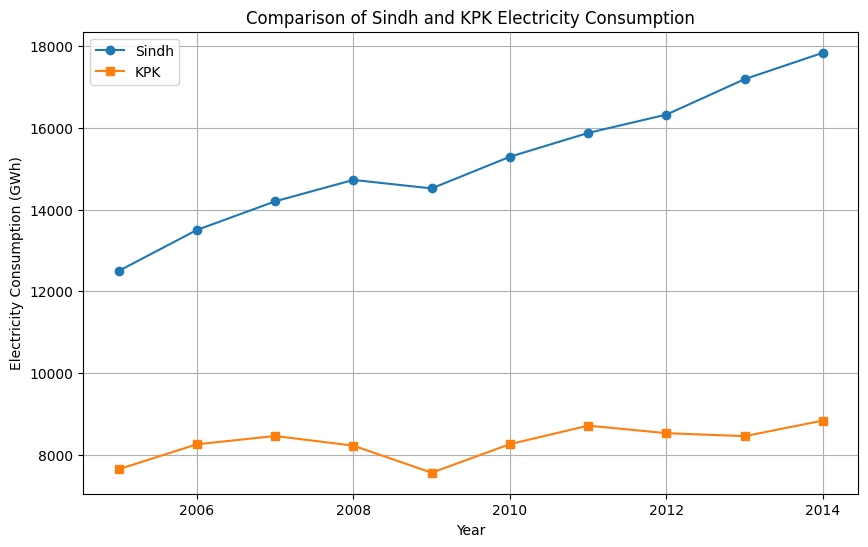


Regression Results:
                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     894.5
Date:                Sat, 04 Jan 2025   Prob (F-statistic):           5.07e-18
Time:                        15:22:11   Log-Likelihood:                -141.07
No. Observations:                  20   AIC:                             290.1
Df Residuals:                      16   BIC:                             294.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7804.9333    213.79

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Name of uploaded file
file_name = ''

# Read data from the sheets
sheet1_df = pd.read_excel(file_name, sheet_name='Sindh Pre ')
sheet2_df = pd.read_excel(file_name, sheet_name='KPK Pre')

# Merge the dataframes on 'Year' column
merged_df = pd.merge(sheet1_df, sheet2_df, on='Year')

# Rename columns for simplicity (optional)
merged_df.rename(columns={
    'Electricity consumption in GWh (Sindh)': 'Sindh_Data',
    'Electricity consumption in GWh (KPK)': 'KPK_Data'
}, inplace=True)

# Display the merged dataframe (optional)
print("Merged DataFrame:")
print(merged_df)

# Plot the data (visualization)
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Year'], merged_df['Sindh_Data'], label='Sindh', marker='o')
plt.plot(merged_df['Year'], merged_df['KPK_Data'], label='KPK', marker='s')
plt.xlabel('Year')
plt.ylabel('Electricity Consumption (GWh)')
plt.title('Comparison of Sindh and KPK Electricity Consumption')
plt.legend()
plt.grid()
plt.show()

# Prepare data for regression analysis
# Melt the dataframe to have a "long format" with columns: 'Year', 'Time', 'Group', 'Value'
merged_df['Time'] = range(1, len(merged_df) + 1)  # Create a numerical Time variable
long_df = pd.melt(
    merged_df,
    id_vars=['Year', 'Time'],
    value_vars=['Sindh_Data', 'KPK_Data'],
    var_name='Group',
    value_name='Value'
)

# Map Group to binary: Sindh = 1, KPK = 0
long_df['Group'] = long_df['Group'].map({'Sindh_Data': 1, 'KPK_Data': 0})

# Fit a regression model to test parallel trends
model = smf.ols('Value ~ Time * Group', data=long_df).fit()

# Print the regression summary
print("\nRegression Results:")
print(model.summary())

# Interpretation: Check the interaction term 'Time:Group'


In [ ]:
import pandas as pd

#Name of uploaded file
file_name ='Final Dataset.xlsx'

#Read data from the sheets
sheet1_df = pd.read_excel(file_name, sheet_name='Sindh')
sheet2_df = pd.read_excel(file_name, sheet_name='KPK')

# Merge the dataframes on 'Year' column
merged_df1 = pd.merge(sheet1_df, sheet2_df, on='Year')

merged_df1


,Year,Electricity consumption in GWh (Sindh),Electricity consumption in GWh (KPK)
0,2005,12496,7644
1,2006,13500,8255
2,2007,14201,8459
3,2008,14726,8223
4,2009,14518,7560
5,2010,15293,8259
6,2011,15876,8712
7,2012,16325,8528
8,2013,17193,8455
9,2014,17839,8837


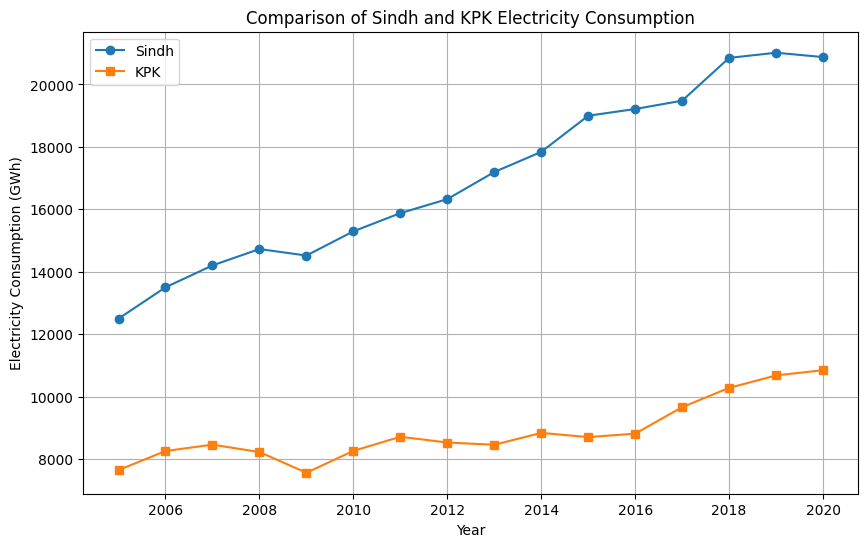

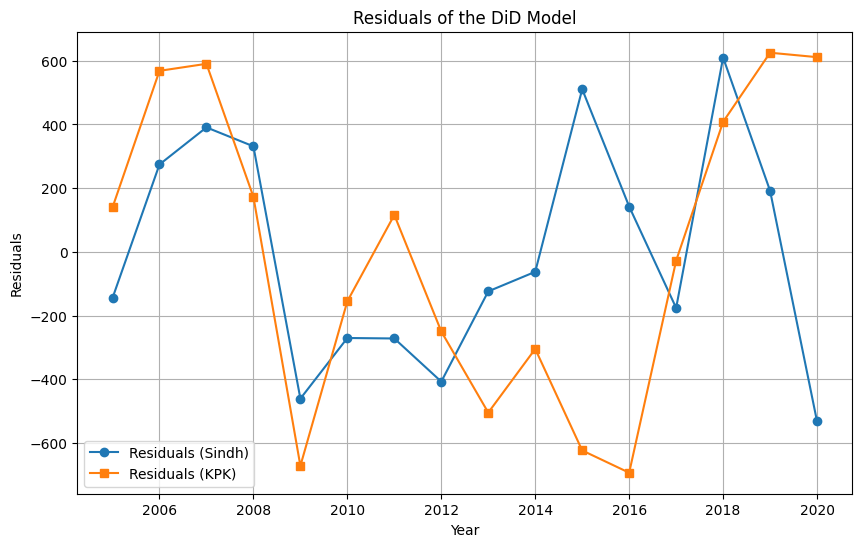


Adjusted Regression Results:
                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     1154.
Date:                Sat, 04 Jan 2025   Prob (F-statistic):           1.97e-29
Time:                        15:44:50   Log-Likelihood:                -237.79
No. Observations:                  32   AIC:                             483.6
Df Residuals:                      28   BIC:                             489.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7322.5750 

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Name of uploaded file
file_name = 'Final Dataset.xlsx'

# Read data from the sheets
sheet1_df = pd.read_excel(file_name, sheet_name='Sindh')
sheet2_df = pd.read_excel(file_name, sheet_name='KPK')

# Merge the dataframes on 'Year' column
merged_df = pd.merge(sheet1_df, sheet2_df, on='Year')

# Rename columns for simplicity (optional)
merged_df.rename(columns={
    'Electricity consumption in GWh (Sindh)': 'Sindh_Data',
    'Electricity consumption in GWh (KPK)': 'KPK_Data'
}, inplace=True)

# Plot the data (visualization)
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Year'], merged_df['Sindh_Data'], label='Sindh', marker='o')
plt.plot(merged_df['Year'], merged_df['KPK_Data'], label='KPK', marker='s')
plt.xlabel('Year')
plt.ylabel('Electricity Consumption (GWh)')
plt.title('Comparison of Sindh and KPK Electricity Consumption')
plt.legend()
plt.grid()
plt.show()

# Prepare data for regression analysis
# Melt the dataframe to have a "long format" with columns: 'Year', 'Time', 'Group', 'Value'
merged_df['Time'] = range(1, len(merged_df) + 1)  # Create a numerical Time variable
long_df = pd.melt(
    merged_df,
    id_vars=['Year', 'Time'],
    value_vars=['Sindh_Data', 'KPK_Data'],
    var_name='Group',
    value_name='Value'
)

# Map Group to binary: Sindh = 1, KPK = 0
long_df['Group'] = long_df['Group'].map({'Sindh_Data': 1, 'KPK_Data': 0})

# **Step 1: Visualize the Residuals**

# Fit the original DiD model
model = smf.ols('Value ~ Time * Group', data=long_df).fit()

# Get residuals
residuals = model.resid

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Year'], residuals[:len(merged_df)], label='Residuals (Sindh)', marker='o')
plt.plot(merged_df['Year'], residuals[len(merged_df):], label='Residuals (KPK)', marker='s')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.title('Residuals of the DiD Model')
plt.legend()
plt.grid()
plt.show()

# **Step 2: Adjust Model for Non-Parallel Trends**

# Add group-specific time trends (modify the Time variable by Group)
long_df['Time_Sindh'] = long_df['Time'] * long_df['Group']  # Time for Sindh (Group=1)
long_df['Time_KPK'] = long_df['Time'] * (1 - long_df['Group'])  # Time for KPK (Group=0)

# Fit the adjusted model with group-specific trends
adjusted_model = smf.ols('Value ~ Time_Sindh + Time_KPK + Group', data=long_df).fit()

# Print the adjusted model results
print("\nAdjusted Regression Results:")
print(adjusted_model.summary())


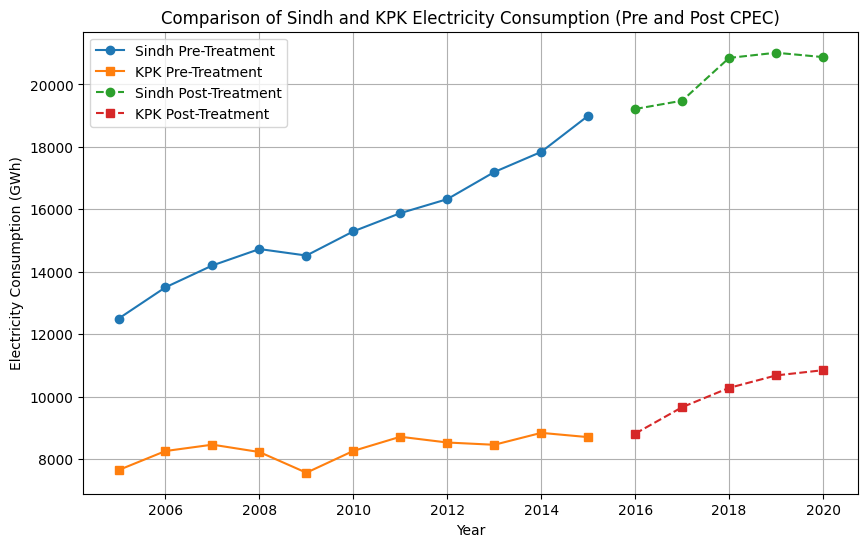

In [69]:
# Plot pre-treatment and post-treatment trends
# Create two groups for the plot: Pre-treatment and Post-treatment

merged_df['Post_Treatment'] = merged_df['Year'] >= 2016  # Assuming treatment starts in 2016

# Plot pre-treatment and post-treatment trends for Sindh and KPK
plt.figure(figsize=(10, 6))
plt.plot(merged_df[merged_df['Post_Treatment'] == False]['Year'], merged_df[merged_df['Post_Treatment'] == False]['Sindh_Data'], label='Sindh Pre-Treatment', marker='o')
plt.plot(merged_df[merged_df['Post_Treatment'] == False]['Year'], merged_df[merged_df['Post_Treatment'] == False]['KPK_Data'], label='KPK Pre-Treatment', marker='s')

plt.plot(merged_df[merged_df['Post_Treatment'] == True]['Year'], merged_df[merged_df['Post_Treatment'] == True]['Sindh_Data'], label='Sindh Post-Treatment', linestyle='--', marker='o')
plt.plot(merged_df[merged_df['Post_Treatment'] == True]['Year'], merged_df[merged_df['Post_Treatment'] == True]['KPK_Data'], label='KPK Post-Treatment', linestyle='--', marker='s')

plt.xlabel('Year')
plt.ylabel('Electricity Consumption (GWh)')
plt.title('Comparison of Sindh and KPK Electricity Consumption (Pre and Post CPEC)')
plt.legend()
plt.grid()
plt.show()


I did a regression to see whether or not the pre treatment trends were parallel and they were not. But it wasnt completely different so I tried to do DiD anyway and see what I would get. From the graph though it doesnt seem like anything interesting happens post 2015. The energy consumption increases for both which I think suggests that theres something else that is effecting energy consumption
